# Chapter 5: k Nearest Neighbours

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

## 5.1 Introduction & Motivation

As last classical classifier, we'll check ot the k-NN (Nearest Neighbors) algorithm. This is based on the very simple and logical idea that observations of the same class must resemble each other. In our digit examples this definitely makes sense, but what does this concetely mean and how can we tell a computer when things resemble each other?

This and much more is what we'll learn in this chapter! Excited yet?

## 5.2 Problem Setting

Once again, no surprises should be found in the following setup:

Image Data Shape (1797, 64)
Label Data Shape (1797,)


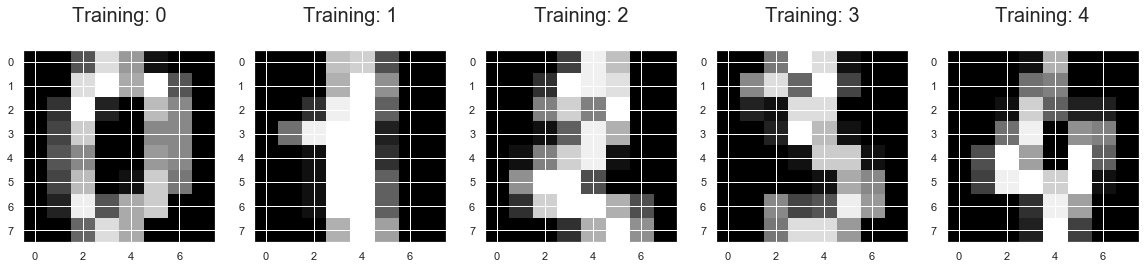

In [2]:
digits = datasets.load_digits()
dir(digits)
# data
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , digits.data.shape)
# Print to show there are 1797 labels (integers from 0–9)
print("Label Data Shape", digits.target.shape)
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
 plt.subplot(1, 5, index + 1)
 plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
 plt.title('Training: %i\n' % label, fontsize = 20)
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

## 5.3 Model

### 5.3.1 Model

In our digit database the indepent variables are difficult to illustrate, so let's look at a dataset like we did in the previous chapter:

![alt text](https://depiesml.files.wordpress.com/2015/08/knn_plot.png?w=600&h=586)

If we want a model to classify this type of data, we'll make use of one very important property of classes of data: they flock together in the right dimensions. That is, in these two variables (F1 and F2), we can clearly see that all the points of the same class are bunled together. In average, we can say that if we take a random blue point, we'll easier find another blue point nearby rather than say a green or red one.

It is exactly this what kNN does: it takes a point which we want to predict. For example, the grey point:

![alt text](https://depiesml.files.wordpress.com/2015/08/knn-k5-initial1.png?w=600&h=586)

The kNN algorithm then calculates the distance of all points starting from that point, and selects the $k$ nearest datapoints. 

![](https://depiesml.files.wordpress.com/2015/08/knn-k5-neighbor.png)

These points then "vote" on which class we would like to predict. Different voting schemes are possible; but most straightforward will be that: the class which is represented the most will be the prediction.

### 5.3.2 Model Estimation

That all sounds easy enough, but let's put that into practice.
We'll make a 9-Nearest-Neighbours classifier and fit it onto our data:

In [8]:
neigh = KNeighborsClassifier(n_neighbors=9)
neigh.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

Next we can either make a prediction for a certain observation, multiple observations, or all observations of our test set:

In [10]:
# Returns a NumPy Array
# Predict for One Observation (image)
neigh.predict(x_test[0].reshape(1,-1))
neigh.predict(x_test[0:10])
predictions = neigh.predict(x_test)

1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       1.00      1.00      1.00        43
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        45
           4       1.00      1.00      1.00        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       1.00      1.00      1.00        48
           8       1.00      1.00      1.00        48
           9       0.98      0.96      0.97        47

    accuracy                           0.99       450
   macro avg       0.99      0.99      0.99       450
weighted avg       0.99      0.99      0.99       450

2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.98      1.00      0.99        43
           2       0.98      1.00      0.99        44
           3       0

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.93      1.00      0.97        43
           2       1.00      0.95      0.98        44
           3       0.96      0.98      0.97        45
           4       1.00      0.97      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       0.94      1.00      0.97        48
           8       0.98      0.88      0.92        48
           9       0.98      0.98      0.98        47

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450

13
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.93      0.98      0.95        43
           2       1.00      0.95      0.98        44
           3       0.

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.91      0.98      0.94        43
           2       0.98      0.93      0.95        44
           3       0.95      0.93      0.94        45
           4       1.00      0.97      0.99        38
           5       0.98      0.98      0.98        48
           6       0.98      1.00      0.99        52
           7       0.92      1.00      0.96        48
           8       0.95      0.85      0.90        48
           9       0.96      0.96      0.96        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450

24
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.91      0.98      0.94        43
           2       0.98      0.91      0.94        44
           3       0.

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.91      0.98      0.94        43
           2       1.00      0.89      0.94        44
           3       0.95      0.93      0.94        45
           4       1.00      0.97      0.99        38
           5       0.98      0.98      0.98        48
           6       0.96      1.00      0.98        52
           7       0.91      1.00      0.95        48
           8       0.93      0.85      0.89        48
           9       0.96      0.96      0.96        47

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450

36
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.91      0.98      0.94        43
           2       1.00      0.89      0.94        44
           3       0.

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.90      0.88      0.89        43
           2       0.91      0.89      0.90        44
           3       0.95      0.93      0.94        45
           4       1.00      0.97      0.99        38
           5       0.94      0.98      0.96        48
           6       0.96      1.00      0.98        52
           7       0.91      1.00      0.95        48
           8       0.93      0.83      0.88        48
           9       0.96      0.91      0.93        47

    accuracy                           0.94       450
   macro avg       0.94      0.94      0.94       450
weighted avg       0.94      0.94      0.94       450

48
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.90      0.88      0.89        43
           2       0.91      0.89      0.90        44
           3       0.

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.84      0.88      0.86        43
           2       0.90      0.86      0.88        44
           3       0.93      0.93      0.93        45
           4       1.00      0.95      0.97        38
           5       0.94      0.98      0.96        48
           6       0.96      1.00      0.98        52
           7       0.89      1.00      0.94        48
           8       0.97      0.81      0.89        48
           9       0.96      0.91      0.93        47

    accuracy                           0.93       450
   macro avg       0.94      0.93      0.93       450
weighted avg       0.94      0.93      0.93       450

60
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.84      0.88      0.86        43
           2       0.90      0.86      0.88        44
           3       0.

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.82      0.84      0.83        43
           2       0.86      0.86      0.86        44
           3       0.93      0.93      0.93        45
           4       1.00      0.92      0.96        38
           5       0.94      0.96      0.95        48
           6       0.96      1.00      0.98        52
           7       0.89      1.00      0.94        48
           8       0.97      0.79      0.87        48
           9       0.91      0.91      0.91        47

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.92       450

72
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.82      0.84      0.83        43
           2       0.86      0.86      0.86        44
           3       0.

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.80      0.86      0.83        43
           2       0.88      0.86      0.87        44
           3       0.91      0.93      0.92        45
           4       1.00      0.92      0.96        38
           5       0.94      0.92      0.93        48
           6       0.96      1.00      0.98        52
           7       0.89      1.00      0.94        48
           8       0.97      0.75      0.85        48
           9       0.88      0.91      0.90        47

    accuracy                           0.92       450
   macro avg       0.92      0.92      0.92       450
weighted avg       0.92      0.92      0.91       450

84
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.81      0.88      0.84        43
           2       0.90      0.86      0.88        44
           3       0.

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.79      0.88      0.84        43
           2       0.90      0.86      0.88        44
           3       0.91      0.93      0.92        45
           4       0.97      0.89      0.93        38
           5       0.93      0.90      0.91        48
           6       0.96      1.00      0.98        52
           7       0.87      1.00      0.93        48
           8       0.97      0.73      0.83        48
           9       0.86      0.89      0.88        47

    accuracy                           0.91       450
   macro avg       0.91      0.91      0.91       450
weighted avg       0.91      0.91      0.91       450

96
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.79      0.86      0.82        43
           2       0.90      0.86      0.88        44
           3       0.

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.79      0.86      0.82        43
           2       0.90      0.84      0.87        44
           3       0.89      0.93      0.91        45
           4       0.97      0.87      0.92        38
           5       0.93      0.90      0.91        48
           6       0.95      1.00      0.97        52
           7       0.86      1.00      0.92        48
           8       0.97      0.73      0.83        48
           9       0.86      0.89      0.88        47

    accuracy                           0.90       450
   macro avg       0.91      0.90      0.90       450
weighted avg       0.91      0.90      0.90       450

108
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.78      0.84      0.81        43
           2       0.90      0.84      0.87        44
           3       0

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.78      0.81      0.80        43
           2       0.90      0.84      0.87        44
           3       0.89      0.93      0.91        45
           4       0.97      0.87      0.92        38
           5       0.93      0.88      0.90        48
           6       0.95      1.00      0.97        52
           7       0.86      1.00      0.92        48
           8       0.97      0.71      0.82        48
           9       0.79      0.89      0.84        47

    accuracy                           0.89       450
   macro avg       0.90      0.89      0.89       450
weighted avg       0.90      0.89      0.89       450

120
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.78      0.81      0.80        43
           2       0.90      0.84      0.87        44
           3       0

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.77      0.77      0.77        43
           2       0.90      0.84      0.87        44
           3       0.84      0.93      0.88        45
           4       0.97      0.87      0.92        38
           5       0.93      0.88      0.90        48
           6       0.94      0.98      0.96        52
           7       0.86      1.00      0.92        48
           8       0.97      0.73      0.83        48
           9       0.77      0.85      0.81        47

    accuracy                           0.88       450
   macro avg       0.89      0.88      0.88       450
weighted avg       0.89      0.88      0.88       450

132
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.77      0.77      0.77        43
           2       0.90      0.84      0.87        44
           3       0

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.77      0.77      0.77        43
           2       0.90      0.84      0.87        44
           3       0.88      0.93      0.90        45
           4       0.97      0.87      0.92        38
           5       0.93      0.88      0.90        48
           6       0.93      0.98      0.95        52
           7       0.86      1.00      0.92        48
           8       0.97      0.73      0.83        48
           9       0.75      0.85      0.80        47

    accuracy                           0.88       450
   macro avg       0.89      0.88      0.88       450
weighted avg       0.89      0.88      0.88       450

144
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        37
           1       0.77      0.77      0.77        43
           2       0.90      0.84      0.87        44
           3       0

## 5.4 Model Evaluation

### Accuracy

In [13]:
# accuracy
# Use score method to get accuracy of model
score = neigh.score(x_test, y_test)
print(score)

0.9777777777777777


##### Question 1: Tweak the n_neighbors parameter to check which model gives the highest accuracy. From when does tweaking the parameter doesn't change much anymore? Interpret! Explain what is happening in the model, and what the influence is on the accuracy. Is this logical?


### Precision

In [14]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        37
           1       0.93      1.00      0.97        43
           2       1.00      0.98      0.99        44
           3       0.96      1.00      0.98        45
           4       1.00      0.97      0.99        38
           5       0.98      0.98      0.98        48
           6       1.00      1.00      1.00        52
           7       0.94      1.00      0.97        48
           8       1.00      0.88      0.93        48
           9       0.98      0.98      0.98        47

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



##### Question 2: Tweak the n_neighbors parameter to check which model gives the highest precision. From when does tweaking the parameter doesn't change much anymore? Interpret! Explain what is happening in the model, and what the influence is on the precision. Is this logical?

### Confusion Matrix

You should by now be familiar with the confusion Matrix. 

##### Question 3: Make the confusion matrix and interpret it.

## 5.5 Exercises

##### Question 1: See section 5.4
##### Question 2: See section 5.4
##### Question 3: See section 5.4
##### Question 4: 
Compare the optimal n_neighbours model to the optimal logistic regression and decision tree. Which model do you prefer based upon the accuracy? Which model do you prefer based upon the precision? Which model overall? Or is there no unambiguous choice to be made?
##### Question 5: 
If you had to choose, would you choose a model with higher accuracy of higher precision? Why? Do some online research on the advantages/disadvantages! What does this concretely mean for the digits dataset?